#### Crystal Violet Plaques

#### Loading packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm

from PyPlaque.experiment import ExperimentCrystalVioletPlaque
from PyPlaque.specimen import PlaquesMask
from PyPlaque.utils import plot_bbox_plaques_mask, boxplot_quants

/Users/de29/Applications/miniforge3/envs/pyplaque/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Initialising parameters and data
###### Since we would now like to get the readouts and see the usefulness other functionalities from PyPlaque for a Crystal Violet Plate, we define a new ```ExperimentCrystalVioletPlaque``` class instance to work with them.<br> ```base_dir``` is folder above the image and mask folders for all the plates. ```params``` are set to None to choose using the default parameters but values can be updated. <br>Using ```exp.get_individual_plates()``` we get the individual plate and plate mask folders for the given pattern and ```exp.get_number_of_plates()``` gives us the number of plates found according to pattern, here just 1. The maximum number of wells per channel here for the data we have considered is 6.

In [2]:
#loading multiple plates and plate masks as an experiment
base_dir = '../../../data_backup/samples_crystal_violet_plaques/'

exp = ExperimentCrystalVioletPlaque(base_dir+'plaques_image_png/', base_dir+'plaques_mask_png/',
                                        params = None) # default values in class, option to update

In [3]:
#In this case, the individual plate is of 6 wells for crystal violet plaques and
#their corresponding mask directories. Make sure to have similar directories for images and masks(even if empty)
plate_dirs, plate_mask_dirs = exp.get_individual_plates(folder_pattern=r'6446$')

print(plate_dirs, plate_mask_dirs)

#We are choosing via the pattern above to ignore all other plates other than this one
print(exp.get_number_of_plates())

['IMG_6446'] ['IMG_6446']
1


#### Crystal Violet Wells and Masks
###### ```exp.load_well_images_and_masks_for_plate()``` helps us load into memory all data for the crystal violet plate, corresponding to the given index from the plates found ```plate_id``` and file pattern ```file_pattern```. Here the mask path is not empty for us but they can also be generated from images as we will show later. Unlike in Fluorescent Plate we do not generate these by default if missing since it is a little more difficult in this case and it is up to the user whether to use it after seeing the results below.<br>We also show an example where we can take only one well into consideration by using the appropriate ```file_pattern``` regex here ```'png_1'``` within ```exp.load_well_images_and_masks_for_plate()```. Next we show reading of more wells according to other file patterns.

In [4]:
#Example considering 1 particular well 'png_1' from the selected plate
plate_dict = exp.load_well_images_and_masks_for_plate(plate_id=0, additional_subfolders=None,
                                                                            file_pattern=r'png_1')
print(plate_dict.keys())

6it [00:00, 8065.97it/s]
100%|██████████| 1/1 [00:00<00:00, 189.56it/s]
6it [00:00, 23990.30it/s]
100%|██████████| 1/1 [00:00<00:00, 5127.51it/s]

dict_keys(['IMG_6446'])


###### We then show the image name, image and mask from the loaded data for the single well ```'png_1'```.

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_1.png


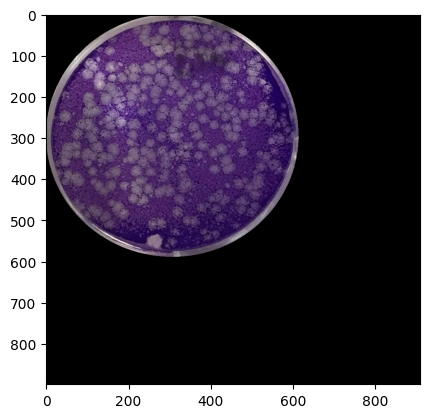

In [5]:
print(plate_dict[plate_dirs[0]]['image_name'][0])
plt.imshow(plate_dict[plate_dirs[0]]['img'][0])

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_1.png


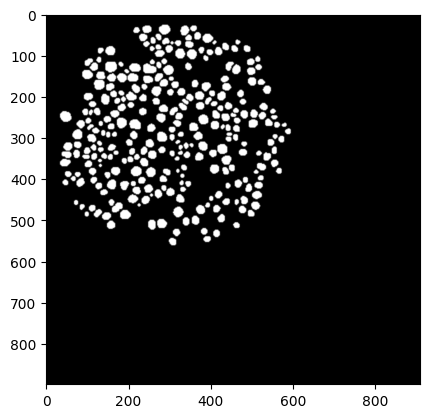

In [6]:
print(plate_dict[plate_dirs[0]]['image_name'][0])
plt.imshow(plate_dict[plate_dirs[0]]['mask'][0],cmap='gray')

#### Grayscale Crystal Violet Wells and Masks
###### ```exp.load_well_images_and_masks_for_plate()``` also has the option to load into memory all data for the crystal violet plate in grayscale using the ```all_grayscale``` flag. This is particularly useful because it reduces our computation cost due to single channel instead of multi-channel images and is necessary for certain functionalities such as eccentricity readouts of plaques in a well.<br> We then verify the number of images read and show an image name, image from the loaded data for the plate.

In [7]:
#Example considering all wells from the selected plate reading images in grayscale
plate_dict = exp.load_well_images_and_masks_for_plate(plate_id=0, additional_subfolders=None,
                                                            all_grayscale=True, file_pattern=None)
print(plate_dict.keys())

6it [00:00, 15621.24it/s]
100%|██████████| 6/6 [00:00<00:00, 56.12it/s]
6it [00:00, 21527.65it/s]
100%|██████████| 6/6 [00:00<00:00, 402.71it/s]

dict_keys(['IMG_6446'])


In [8]:
print(len(plate_dict[plate_dirs[0]]['img']))

6


../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_1.png


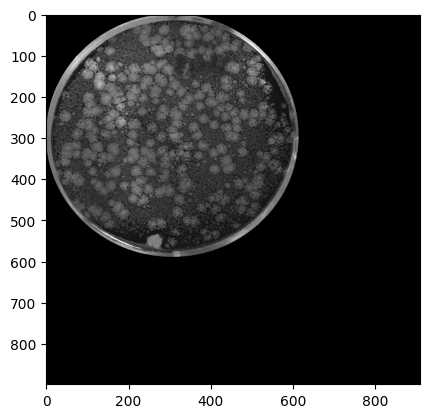

In [9]:
print(plate_dict[plate_dirs[0]]['image_name'][0])
plt.imshow(plate_dict[plate_dirs[0]]['img'][0], cmap='gray')

###### We can use the function ```exp.extract_masked_wells()``` to get the masked image of the wells that helps us to get an unobstructed view of the plaques in the wells without the background of the plate, medium or any other noise.<br> Here we take the image from index 0 of the plate dictionary ```plate_dict``` and show the masked plaques in it.

In [10]:
# Assuming that wells were numbered in raster scan fashion from left to right, row by row
plate_dict = exp.extract_masked_wells(plate_id=0)

100%|██████████| 6/6 [00:00<00:00, 1145.05it/s]


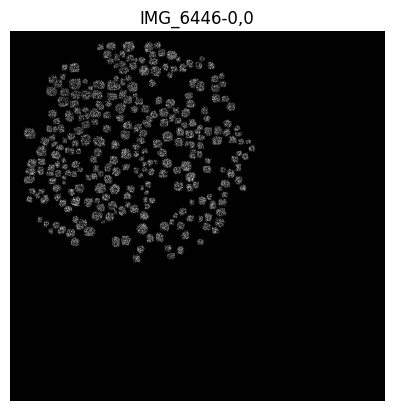

In [11]:
i = 0
j = 0
plt.figure()
plt.axis('off')
plt.title(plate_dirs[0]+"-"+str(i)+","+str(j))
plt.imshow(plate_dict[plate_dirs[0]]['masked_img'][0], cmap='gray')
# plt.savefig("../../../manuscript/figs/masked_plaques_6446_"+str(i)+str(j)+".png",
# bbox_inches='tight', dpi=300)

#### Getting Plaque Count
###### Since counting of plaques in a viral well is one of the most basic tasks performed by virologists, we would want to use automated software such as PyPlaque to achieve it. We can do so by instantiating the ```PlaquesMask()``` class for each of the wells (here only the mask of the well being important for the count). We can then use the ```plq_mask.get_plaques()``` function to get the count of the plaque in the well. The ```min_area``` and ```max_area``` parameters here can help to look at a different set of plaques within the size range of the default value of these parameters can be used.

In [12]:
# Getting count of plaques from the binary masks of the plaques
plaques_mask_gt_list = [PlaquesMask(name = str(plate_dict[plate_dirs[0]]['image_name'][i]),
                                plaques_mask = plate_dict[plate_dirs[0]]['mask'][i]) 
                    for i in tqdm(range(len(plate_dict[plate_dirs[0]]['img'])))]
plaques_count_gt_list = [len(plq_mask.get_plaques()) for plq_mask in tqdm(plaques_mask_gt_list)]

[print(plq_mask.name, " : ", plq_count, "\n") 
        for (plq_mask, plq_count) in tqdm(list(zip(plaques_mask_gt_list, plaques_count_gt_list)))]


100%|██████████| 6/6 [00:00<00:00, 103991.01it/s]

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_1.png  :  114 

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_2.png  :  109 

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_3.png  :  166 

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_4.png  :  82 

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_5.png  :  6 

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_6.png  :  0 



[None, None, None, None, None, None]

#### Mask Generation Plaques
###### Here we create a new instance of an experiment ```exp2``` where we assume that we do not have the mask of the plaques available. We can tell the experiment to not expect it using the ```read_mask``` flag by setting it to False.Here we take only one well into consideration by using the appropriate ```file_pattern``` regex here ```'png_1'```.We show the resulting binary virus mask that is formed based on ```params``` that are the default ones used here.

6it [00:00, 21509.25it/s]
100%|██████████| 1/1 [00:00<00:00, 133.69it/s]

../../../data_backup/samples_crystal_violet_plaques/plaques_image_png/IMG_6446/IMG_6446.png_1.png


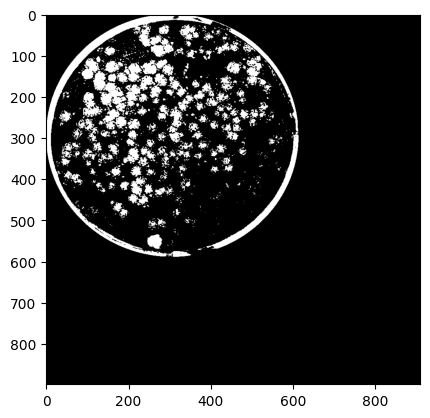

In [13]:
# Getting masks generated from images in case we do not have them already
exp2 = ExperimentCrystalVioletPlaque(base_dir+'plaques_image_png/', base_dir+'plaques_mask_png/',
                                        params = None) # default values in class, option to update
_, _ = exp2.get_individual_plates(folder_pattern=r'6446$')
plate_dict_no_mask = exp2.load_well_images_and_masks_for_plate(plate_id=0,
                additional_subfolders=None, read_mask=False, all_grayscale=True, 
                file_pattern=r'png_1')
print(plate_dict_no_mask[plate_dirs[0]]['image_name'][0])
plt.imshow(plate_dict_no_mask[plate_dirs[0]]['mask'][0], cmap='gray')

#### Plaque Bounding Boxes
###### Here we plot the bounding boxes around the detected plaques. The ```.get_plaques()``` function can take different values for ```min_area``` and ```max_area``` to give different results. 

100%|██████████| 114/114 [00:00<00:00, 4511.66it/s]


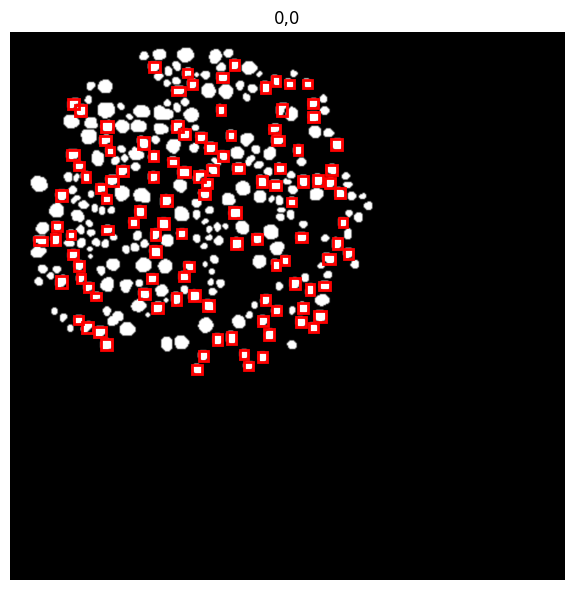

100%|██████████| 109/109 [00:00<00:00, 1896.73it/s]


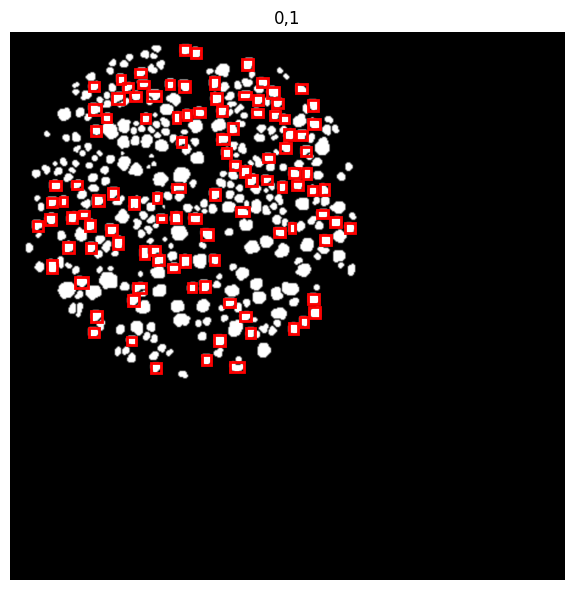

100%|██████████| 166/166 [00:00<00:00, 4084.25it/s]


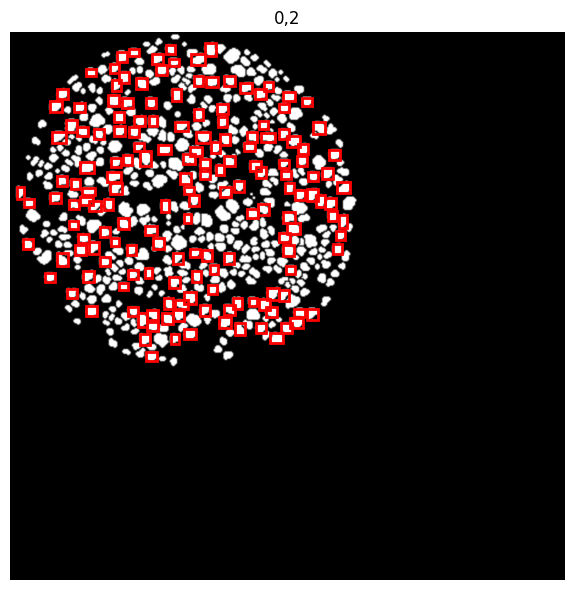

100%|██████████| 82/82 [00:00<00:00, 3880.20it/s]


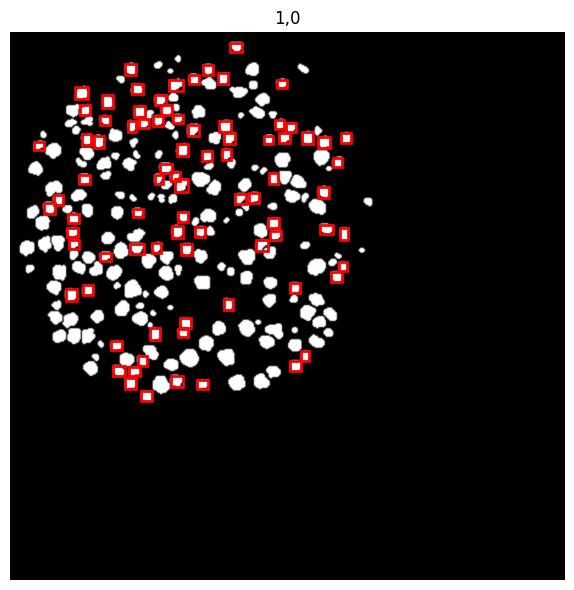

100%|██████████| 6/6 [00:00<00:00, 3470.19it/s]


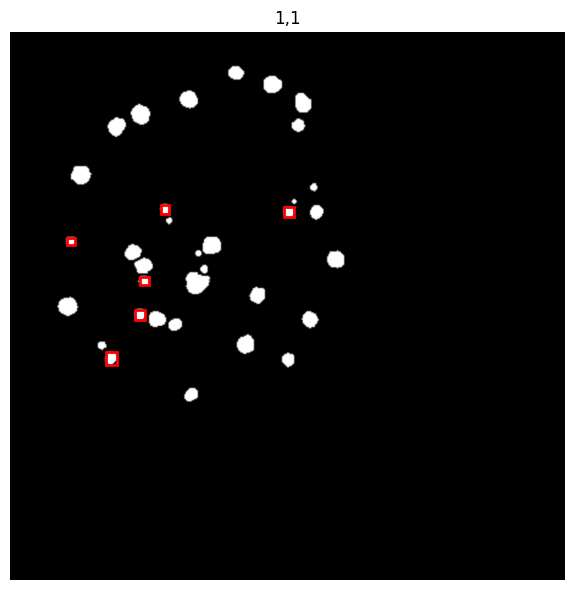

0it [00:00, ?it/s]/6 [00:06<00:01,  1.13s/it]
0it [00:00, ?it/s]


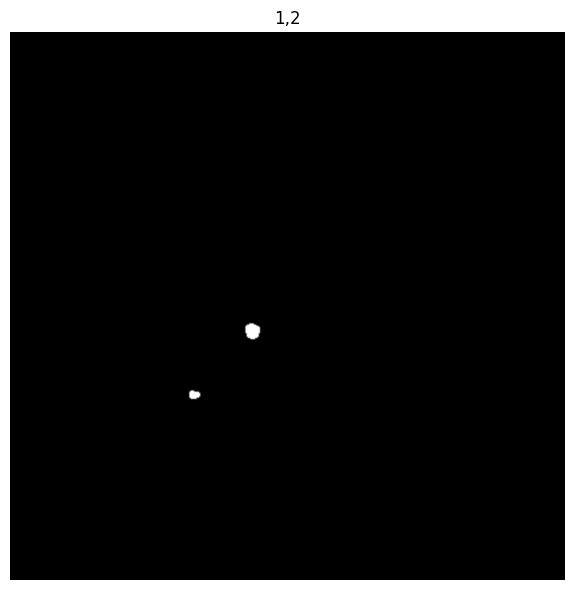

100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


[None, None, None, None, None, None]

In [14]:
# Plotting bounding boxes around individual plaques (in this case from existing binary mask, 
# but could also be done from generated mask)

[plot_bbox_plaques_mask(i//exp.params['crystal_violet']['ncols'],
                        i%exp.params['crystal_violet']['ncols'],
                        plaques_mask_gt_list[i].plaques_mask, # from 3 cells above
                        plaques_mask_gt_list[i].get_plaques()) 
                        for i in tqdm(range(len(plaques_mask_gt_list)))]

# save_path = "../../../manuscript/figs/plaque_6446_00_plaque_marked.png"

#### Plaque Measures
###### It may also be crucial to get other measurements about plaques in the well. For this we can use the function ```get_measure()```. It returns measurements such as ```'mean_plq_size'```, ```'med_plq_size'``` etc. We can also use the ```.plot_centroid()``` function to plot the circles around the centroid of the detected plaques and calculated radii and a circumscribing circle around the centroid of all the plaques detected. This will not plot anything in case no plaque is detected.

 17%|█▋        | 1/6 [00:01<00:05,  1.19s/it]

0 , 0  :  {'mean_plq_size': 201.16940789473685, 'med_plq_size': 194.375, 'centroid': [316.4736842105263, 298.2105263157895], 'mean_plq_ecc': 0.3285311217593585, 'mean_roundness': 4.790632072283932}


 33%|███▎      | 2/6 [00:02<00:05,  1.37s/it]

0 , 1  :  {'mean_plq_size': 206.0223623853211, 'med_plq_size': 196.5, 'centroid': [307.61467889908255, 259.27522935779814], 'mean_plq_ecc': 0.38772505325172885, 'mean_roundness': 4.370254984079839}


 50%|█████     | 3/6 [00:04<00:05,  1.68s/it]

0 , 2  :  {'mean_plq_size': 211.62198795180723, 'med_plq_size': 210.6875, 'centroid': [294.8855421686747, 269.8975903614458], 'mean_plq_ecc': 0.47424777666826984, 'mean_roundness': 4.10666997057273}


 83%|████████▎ | 5/6 [00:06<00:00,  1.01it/s]

1 , 0  :  {'mean_plq_size': 214.9001524390244, 'med_plq_size': 212.1875, 'centroid': [294.9146341463415, 276.5], 'mean_plq_ecc': 0.47755660796863303, 'mean_roundness': 5.061757127507895}
1 , 1  :  {'mean_plq_size': 187.09375, 'med_plq_size': 183.75, 'centroid': [235.0, 389.0], 'mean_plq_ecc': 0.10038982149158426, 'mean_roundness': 2.6977677321617253}


/Users/de29/Applications/miniforge3/envs/pyplaque/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/de29/Applications/miniforge3/envs/pyplaque/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 6/6 [00:06<00:00,  1.00s/it]


1 , 2  :  {'mean_plq_size': 0, 'med_plq_size': 0, 'centroid': [None, None], 'mean_plq_ecc': nan, 'mean_roundness': nan}


  0%|          | 0/6 [00:00<?, ?it/s]

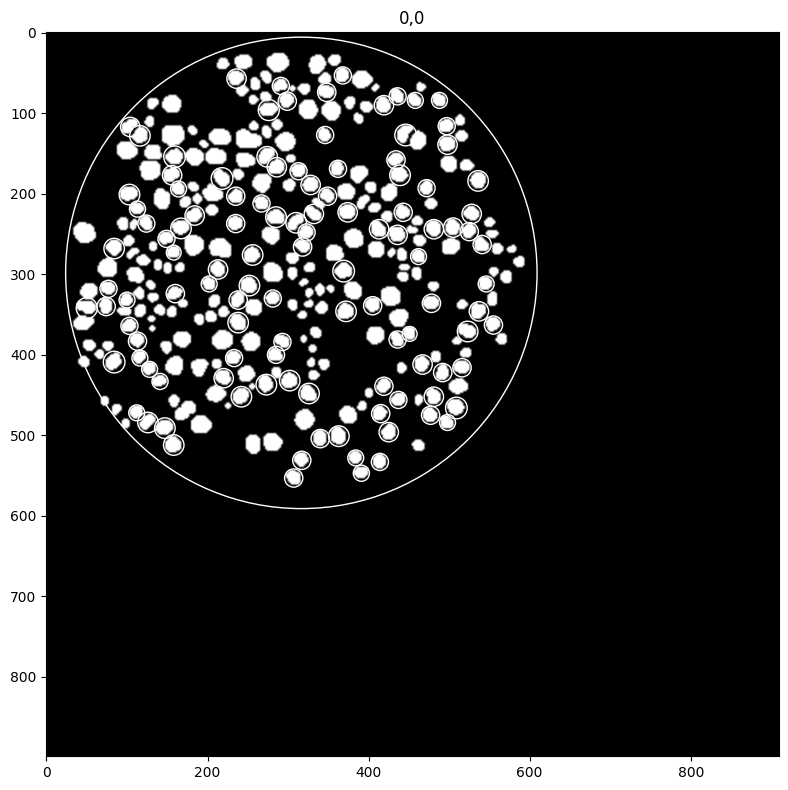

 17%|█▋        | 1/6 [00:00<00:01,  3.56it/s]

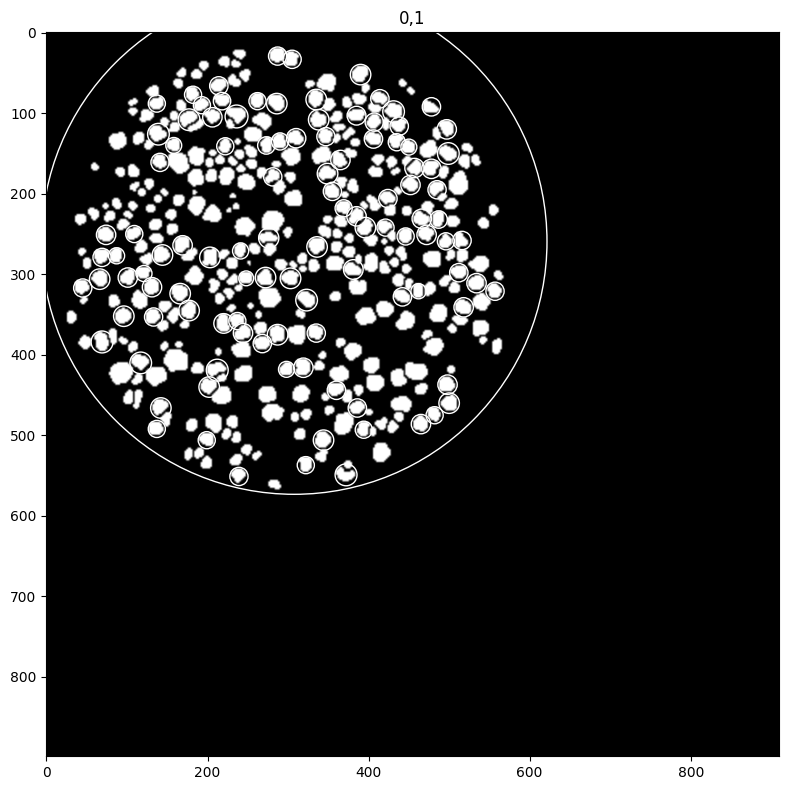

 33%|███▎      | 2/6 [00:00<00:01,  3.64it/s]

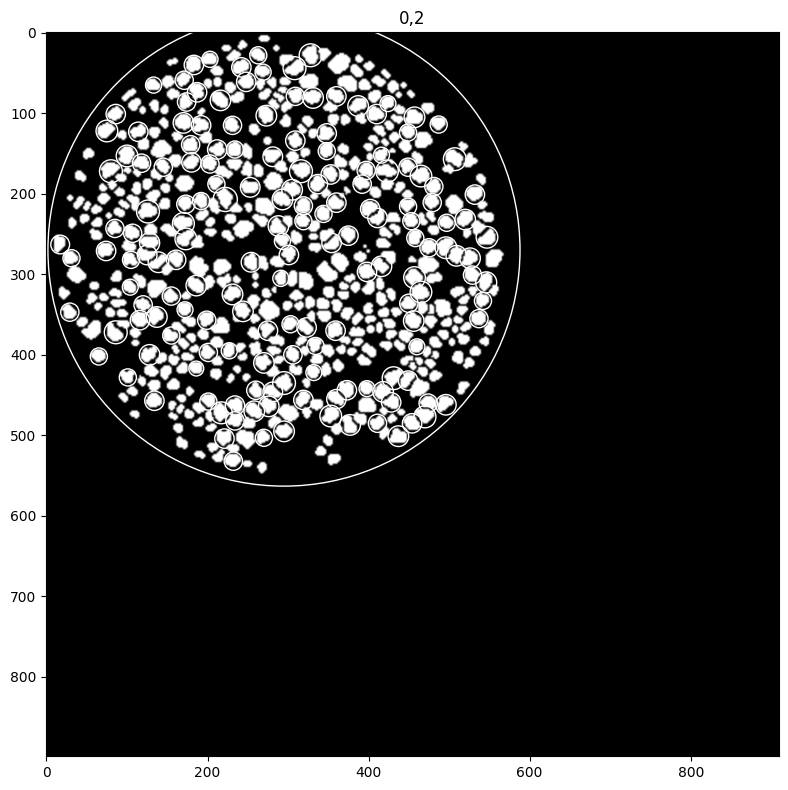

 50%|█████     | 3/6 [00:00<00:00,  3.34it/s]

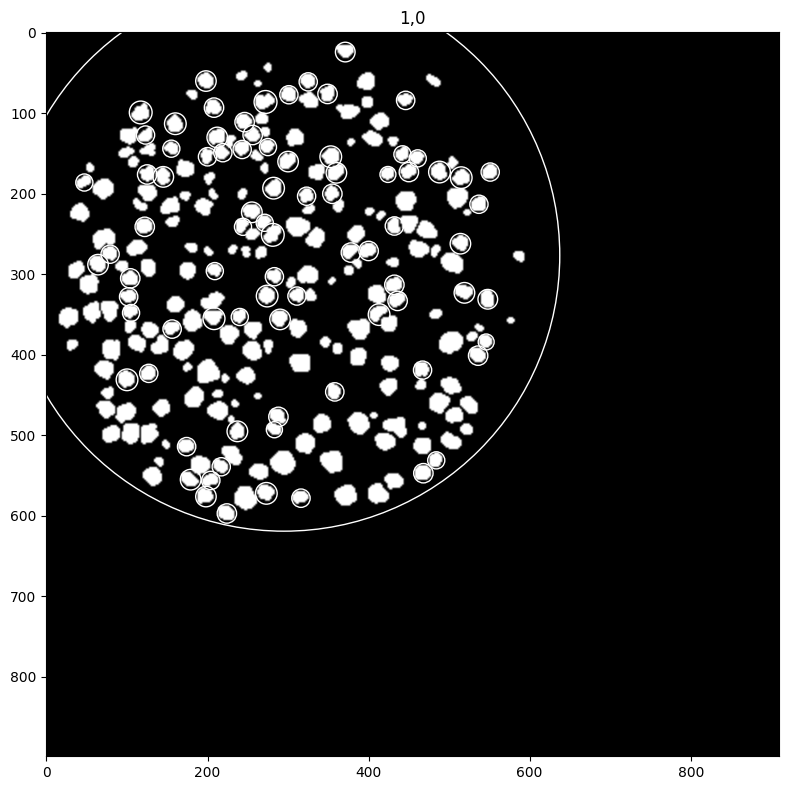

 67%|██████▋   | 4/6 [00:01<00:00,  3.45it/s]

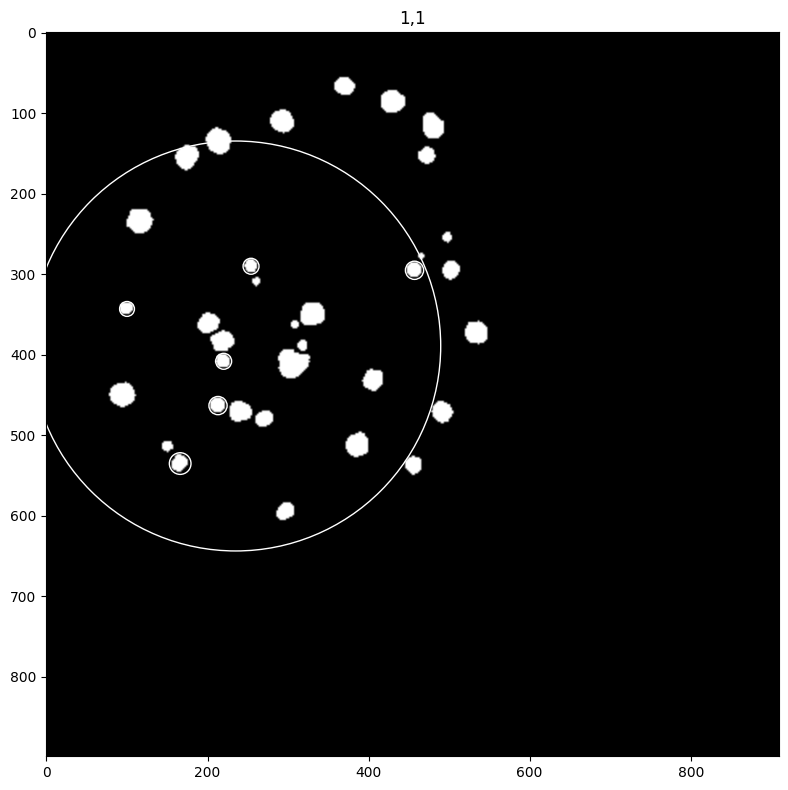

 83%|████████▎ | 5/6 [00:01<00:00,  3.99it/s]

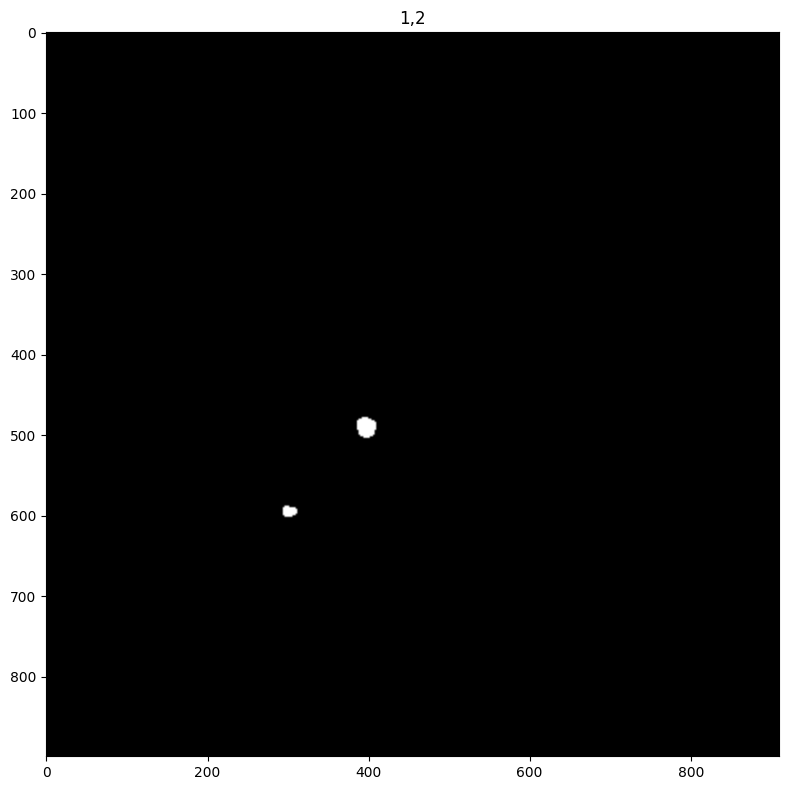

100%|██████████| 6/6 [00:01<00:00,  4.08it/s]


In [15]:
# Using the package to get some measurements about the plaques
_ = [print(i//exp.params['crystal_violet']['ncols'], ",",
            i%exp.params['crystal_violet']['ncols'], " : ",
            plaques_mask_gt_list[i].get_measure(plaques_mask_gt_list[i].get_plaques())) 
            for i in tqdm(range(len(plaques_mask_gt_list)))]

_ = [plaques_mask_gt_list[i].plot_centroid(i//exp.params['crystal_violet']['ncols'],
                            i%exp.params['crystal_violet']['ncols']) 
                            for i in tqdm(range(len(plaques_mask_gt_list)))]

#### Plaque Measures Visualisation
###### It may also be crucial to visualise measurements about plaques in the well. For this we can get the measurements into a dataframe and then use boxplots to visualise it. The values of the boxplot upper and lower bounds, q1, q2 and q3 can all be obtained separately too if viewing it in the plot is not convenient.

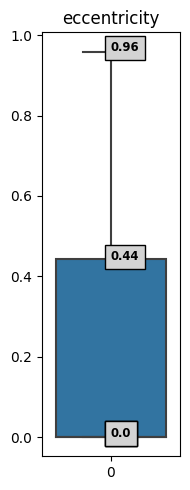

   whishi  whislo   q1  med    q3
0    0.96     0.0  0.0  0.0  0.44


In [17]:
# Other plots we can get about the plaques in a wells

# Choosing different valid area range to detect plaques, otherwise default range is used
plaques_00 = plaques_mask_gt_list[0].get_plaques(min_area=15, max_area=1200)

ecc_ls = [plq.eccentricity() for plq in plaques_00]
roundness_ls = [plq.roundness() for plq in plaques_00]
plq_measures_df = pd.DataFrame()
plq_measures_df['eccentricity'] = ecc_ls
plq_measures_df['roundness'] = roundness_ls

stats = boxplot_quants(plq_measures_df, col_name='eccentricity', return_stats=True)
print(stats)